# XY - Model

In [3]:
#import ising_lib
# from imp import reload 
# reload(ising_lib)
from ising_lib import *
from numpy import *
from matplotlib import pyplot as plt
%matplotlib inline


## Analysis of Data

In [3]:
def variance(X):
    return var(X)
def Average(X):
    return average(X)
def analyze(temparature,L,E,M):
    en,en_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[en,en_err]

### Extracting values from Simulation Data

SET THE FOLDER TO BE ANALYZED HERE ,THE FOLDER SHOULD HAVE 'fnames.txt' WITH NAMES OF 
FILES TO BE ANALYZED

In [4]:
tag_name='full_run'
BASE_FOLDER='../simulation_data/resampled/'+tag_name+'/'
f=open(BASE_FOLDER+"fnames.txt",'r')

In [7]:
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  176


In [8]:
analy=dict()
i=0
extracted_vals=dict()
rslt=open('../extracted_data/'+tag_name+'_analysis','w')
rslt.write('Temp,N,Energy,EnErr,Magetization,MagErr,Specific_Heat,SP_Err,Succeptibility,succepErr\n')
l=len(fnames)
for fn in fnames:
    i+=1
#     if i >1  : break
    dat=get_data_xyModel(fn);
    try:
        L=dat['params']['length of lattice  '];
    except:
        L=dat['params']['N '];    
    try:
        T=dat['params']['T   '];
    except:
        T=dat['params']['T '];    
#     if T<0.75:
#         continue
    if L not in extracted_vals.keys():
        extracted_vals.update({L:{'T':[],'en':[],'en_err':[],'mag':[],'mag_err':[],'sp_heat':[],'sp_heat_err':[],
                                  'sucep':[],'sucep_err':[]}})
    
    print("Doing ",i,"/",l, " L : ",L," T : ",T,"   ",fn)
    N=L*L
#     sdata=sample_data(dat,Max_lags=ml);
    analy=analyze(T,N,dat['energy'],dat['magentization'])
    extracted_vals[L]['T'].append(T)
    extracted_vals[L]['en'].append(analy[3][0])
    extracted_vals[L]['en_err'].append(analy[3][1])
    extracted_vals[L]['mag'].append(analy[0][0])
    extracted_vals[L]['mag_err'].append(analy[0][1])
    extracted_vals[L]['sp_heat'].append(analy[1][0])
    extracted_vals[L]['sp_heat_err'].append(analy[1][1])
    extracted_vals[L]['sucep'].append(analy[2][0]*N)
    extracted_vals[L]['sucep_err'].append(analy[2][1]*N)
    rslt.write(str(T)+","+str(L)+","+
               str(analy[3][0])+","+str(analy[3][1]) +","+
               str(analy[0][0])+","+str(analy[0][1])  )
    rslt.write(","+str(analy[1][0])+","+str(analy[1][1]))
    rslt.write(","+str(analy[2][0]*N)+","+str(analy[2][1]*N)+"\n")

rslt.close()


Doing  1 / 176  L :  12  T :  0.1     ../simulation_data/resampled/full_run/L_12_T_0.100_xy.Rtxt
Doing  2 / 176  L :  12  T :  0.2     ../simulation_data/resampled/full_run/L_12_T_0.200_xy.Rtxt
Doing  3 / 176  L :  12  T :  0.3     ../simulation_data/resampled/full_run/L_12_T_0.300_xy.Rtxt
Doing  4 / 176  L :  12  T :  0.4     ../simulation_data/resampled/full_run/L_12_T_0.400_xy.Rtxt
Doing  5 / 176  L :  12  T :  0.5     ../simulation_data/resampled/full_run/L_12_T_0.500_xy.Rtxt
Doing  6 / 176  L :  12  T :  0.6     ../simulation_data/resampled/full_run/L_12_T_0.600_xy.Rtxt
Doing  7 / 176  L :  12  T :  0.7     ../simulation_data/resampled/full_run/L_12_T_0.700_xy.Rtxt
Doing  8 / 176  L :  12  T :  0.8     ../simulation_data/resampled/full_run/L_12_T_0.800_xy.Rtxt
Doing  9 / 176  L :  12  T :  0.9     ../simulation_data/resampled/full_run/L_12_T_0.900_xy.Rtxt
Doing  10 / 176  L :  12  T :  1     ../simulation_data/resampled/full_run/L_12_T_1.000_xy.Rtxt
Doing  11 / 176  L :  12  T :  

### Reading from Extracted Data

In [7]:
tag_name='N20_40L'

In [8]:
f=open('../extracted_data/'+tag_name+'_analysis','r')
X=True
while(X):
    X=False
    extracted_vals=dict()
    l=f.readline()
    l=f.readline()
    i=0
    while l:
        i+=1
        try:
            it=l[:-1].split(',')
    #         print(it)
            L=int(it[1])
            if L not in extracted_vals.keys():
                extracted_vals.update({L:{'T':[],'en':[],'en_err':[],'mag':[],'mag_err':[],'sp_heat':[],'sp_heat_err':[],
                                          'sucep':[],'sucep_err':[]}})
            extracted_vals[L]['T'].append(float(it[0]))
            extracted_vals[L]['en'].append(float(it[2]))
            extracted_vals[L]['en_err'].append(float(it[3]))
            extracted_vals[L]['mag'].append(float(it[4]))
            extracted_vals[L]['mag_err'].append(float(it[5]))
            extracted_vals[L]['sp_heat'].append(float(it[6]))
            extracted_vals[L]['sp_heat_err'].append(float(it[7]))
            extracted_vals[L]['sucep'].append(float(it[8]))
            extracted_vals[L]['sucep_err'].append(float(it[9]))
            l=f.readline()
        except:
            print(it)
            l=f.readline()
    f.close()
    print(i ," DATA LINES READ")

12  DATA LINES READ


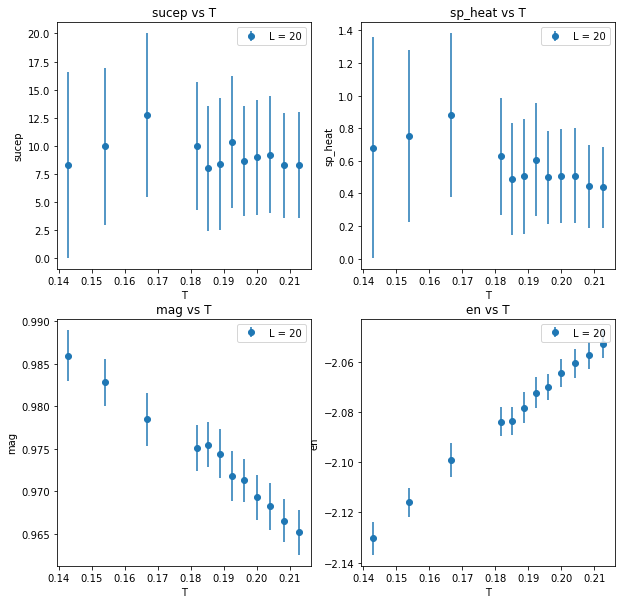

In [9]:
f,axi=plt.subplots(ncols=2,nrows=2,figsize=(10,10))
ax=[axi[0][0],axi[0][1],axi[1][0],axi[1][1]]
t=True
while t:
    t=False
    lbl='sucep'
    for i in extracted_vals.keys():
        Y=[(k/i**2) for k in extracted_vals[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals[i][lbl+"_err"]]
        ax[0].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label="L = "+str(i))
        ax[0].set_xlabel('T')
        ax[0].set_ylabel(lbl)
        ax[0].set_title(lbl+ " vs T")
        ax[0].legend(loc=0)
    lbl="sp_heat"
    for i in extracted_vals.keys():
        Y=[(k/i**2) for k in extracted_vals[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals[i][lbl+"_err"]]
        ax[1].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label="L = "+str(i))
        ax[1].set_xlabel('T')
        ax[1].set_ylabel(lbl)
        ax[1].set_title(lbl+ " vs T")
        ax[1].legend(loc=0)
    lbl="mag"
    for i in extracted_vals.keys():
        Y=[(k/i**2) for k in extracted_vals[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals[i][lbl+"_err"]]
        ax[2].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label="L = "+str(i))
        ax[2].set_xlabel('T')
        ax[2].set_ylabel(lbl)
        ax[2].set_title(lbl+ " vs T")
        ax[2].legend(loc=0)
    lbl="en"
    for i in extracted_vals.keys():
        Y=[(k/i**2) for k in extracted_vals[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals[i][lbl+"_err"]]
        ax[3].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label="L = "+str(i))
        ax[3].set_xlabel('T')
        ax[3].set_ylabel(lbl)
        ax[3].set_title(lbl+ " vs T")
        ax[3].legend(loc=0)
    